<a href="https://colab.research.google.com/github/Nacirjab/analysing-and-predicitons-of-tiktok-top-tracks/blob/main/%F0%9F%8E%B5TikTok_popularity_track_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

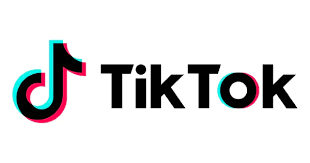

### Introduction

In this notebook we are going to explore the dataset regarding popular tracks on tiktok in 2022. I hope it is to your liking and may be of interest. In case you would like to give me suggestions on how to improve it, they are welcome.

In the next few minutes we are going to perform an exploratory analysis on the dataset, including many visualizations of the data, in order to understand its structure and to look for patterns between the data and our main variable of interest, "**track_pop**".

Next we will look for some interesting information, such as the top 5 most popular songs, the artists who produced the most hit songs, etc.

Last but not least, we are going to test some predictive machine learning models, performing hyperparameter tuning on them, and seeing if we can get a good result with so little data.

<p style="background-color:#239AA9; color:white; text-align:center; padding:20px; font-size:1.2em; border-radius:1em">If you appreciate such content, I ask you to leave an <u>upvote</u>. I would really appreciate it and help me get some medals.</p>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("/TikTok_songs_2022 (1).csv")

print(f"Shape of the dataset -> {df.shape}")
df.head()

Shape of the dataset -> (263, 18)


,track_name,artist_name,artist_pop,album,track_pop,danceability,energy,loudness,mode,key,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,duration_ms
0,Running Up That Hill (A Deal With God),Kate Bush,81,Hounds Of Love,95,0.629,0.547,-13.123,0,10,0.0550,0.7200,0.003140,0.0604,0.197,108.375,4,298933
1,As It Was,Harry Styles,91,As It Was,96,0.520,0.731,-5.338,0,6,0.0557,0.3420,0.001010,0.3110,0.662,173.930,4,167303
2,Sunroof,Nicky Youre,73,Sunroof,44,0.768,0.716,-5.110,1,10,0.0404,0.3500,0.000000,0.1500,0.841,131.430,4,163026
3,Heat Waves,Glass Animals,80,Dreamland (+ Bonus Levels),89,0.761,0.525,-6.900,1,11,0.0944,0.4400,0.000007,0.0921,0.531,80.870,4,238805
4,About Damn Time,Lizzo,81,About Damn Time,92,0.836,0.743,-6.305,0,10,0.0656,0.0995,0.000000,0.3350,0.722,108.966,4,191822


<a id="Description of the columns"></a>
<h1 style="text-align:center"> 📝Description of the columns </h1>

1. <mark style="background-color:#FCDDFC">track_name</mark> - Name of the track
2. <mark style="background-color:#FCDDFC">artist_name</mark> - Name of the artist
3. <mark style="background-color:#FCDDFC">artist_pop</mark> - Popularity of the artist
4. <mark style="background-color:#FCDDFC">album</mark> - Name of the album
5. <mark style="background-color:#FCDDFC">track_pop</mark> - Popularity of the track
6. <mark style="background-color:#FCDDFC">danceability</mark> - Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.
7. <mark style="background-color:#FCDDFC">energy</mark> - Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
8. <mark style="background-color:#FCDDFC">loudness</mark> - The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typically range between -60 and 0 db.
9. <mark style="background-color:#FCDDFC">mode</mark> - Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.
10. <mark style="background-color:#FCDDFC">key</mark> - The key the track is in. Integers map to pitches using standard Pitch Class notation. E.g. 0 = C, 1 = C♯/D♭, 2 = D, and so on. If no key was detected, the value is -1.
11. <mark style="background-color:#FCDDFC">speechiness</mark> - Speechiness detects the presence of spoken words in a track. The more exclusively speech-like the recording (e.g. talk show, audio book, poetry), the closer to 1.0 the attribute value. Values above 0.66 describe tracks that are probably made entirely of spoken words. Values between 0.33 and 0.66 describe tracks that may contain both music and speech, either in sections or layered, including such cases as rap music. Values below 0.33 most likely represent music and other non-speech-like tracks.
12. <mark style="background-color:#FCDDFC">acousticness</mark> - A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
13. <mark style="background-color:#FCDDFC">instrumentalness</mark> - Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
14. <mark style="background-color:#FCDDFC">liveness</mark> - Detects the presence of an audience in the recording. Higher liveness values represent an increased probability that the track was performed live. A value above 0.8 provides strong likelihood that the track is live.
15. <mark style="background-color:#FCDDFC">valence</mark> - A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
16. <mark style="background-color:#FCDDFC">tempo</mark> - The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.
17. <mark style="background-color:#FCDDFC">time_signature</mark> - An estimated time signature. The time signature (meter) is a notational convention to specify how many beats are in each bar (or measure). The time signature ranges from 3 to 7 indicating time signatures of "3/4", to "7/4".
18. <mark style="background-color:#FCDDFC">duration_ms</mark> - The duration of the track in milliseconds.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_name        263 non-null    object 
 1   artist_name       263 non-null    object 
 2   artist_pop        263 non-null    int64  
 3   album             263 non-null    object 
 4   track_pop         263 non-null    int64  
 5   danceability      263 non-null    float64
 6   energy            263 non-null    float64
 7   loudness          263 non-null    float64
 8   mode              263 non-null    int64  
 9   key               263 non-null    int64  
 10  speechiness       263 non-null    float64
 11  acousticness      263 non-null    float64
 12  instrumentalness  263 non-null    float64
 13  liveness          263 non-null    float64
 14  valence           263 non-null    float64
 15  tempo             263 non-null    float64
 16  time_signature    263 non-null    int64  
 1

In [ ]:
# Black - Aqua Blue - Pink
colors = ["#09101F","#72DDF7", '#F7AEF8']

In [ ]:
def set_style(ax):
    sns.despine(ax=ax, left=True)
    ax.grid(axis='y', linewidth=0.3, color='black')

In [ ]:
def hist(df, x, ax, main_color=colors[1], second_color=colors[0], bins=30):

    sns.histplot(data=df, x=x, bins=bins, ax=ax,
                 kde=True, color=main_color,
                 edgecolor=second_color, line_kws={"linestyle":'--'}, linewidth=3
                )
    ax.lines[0].set_color(second_color)
    set_style(ax)

    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")

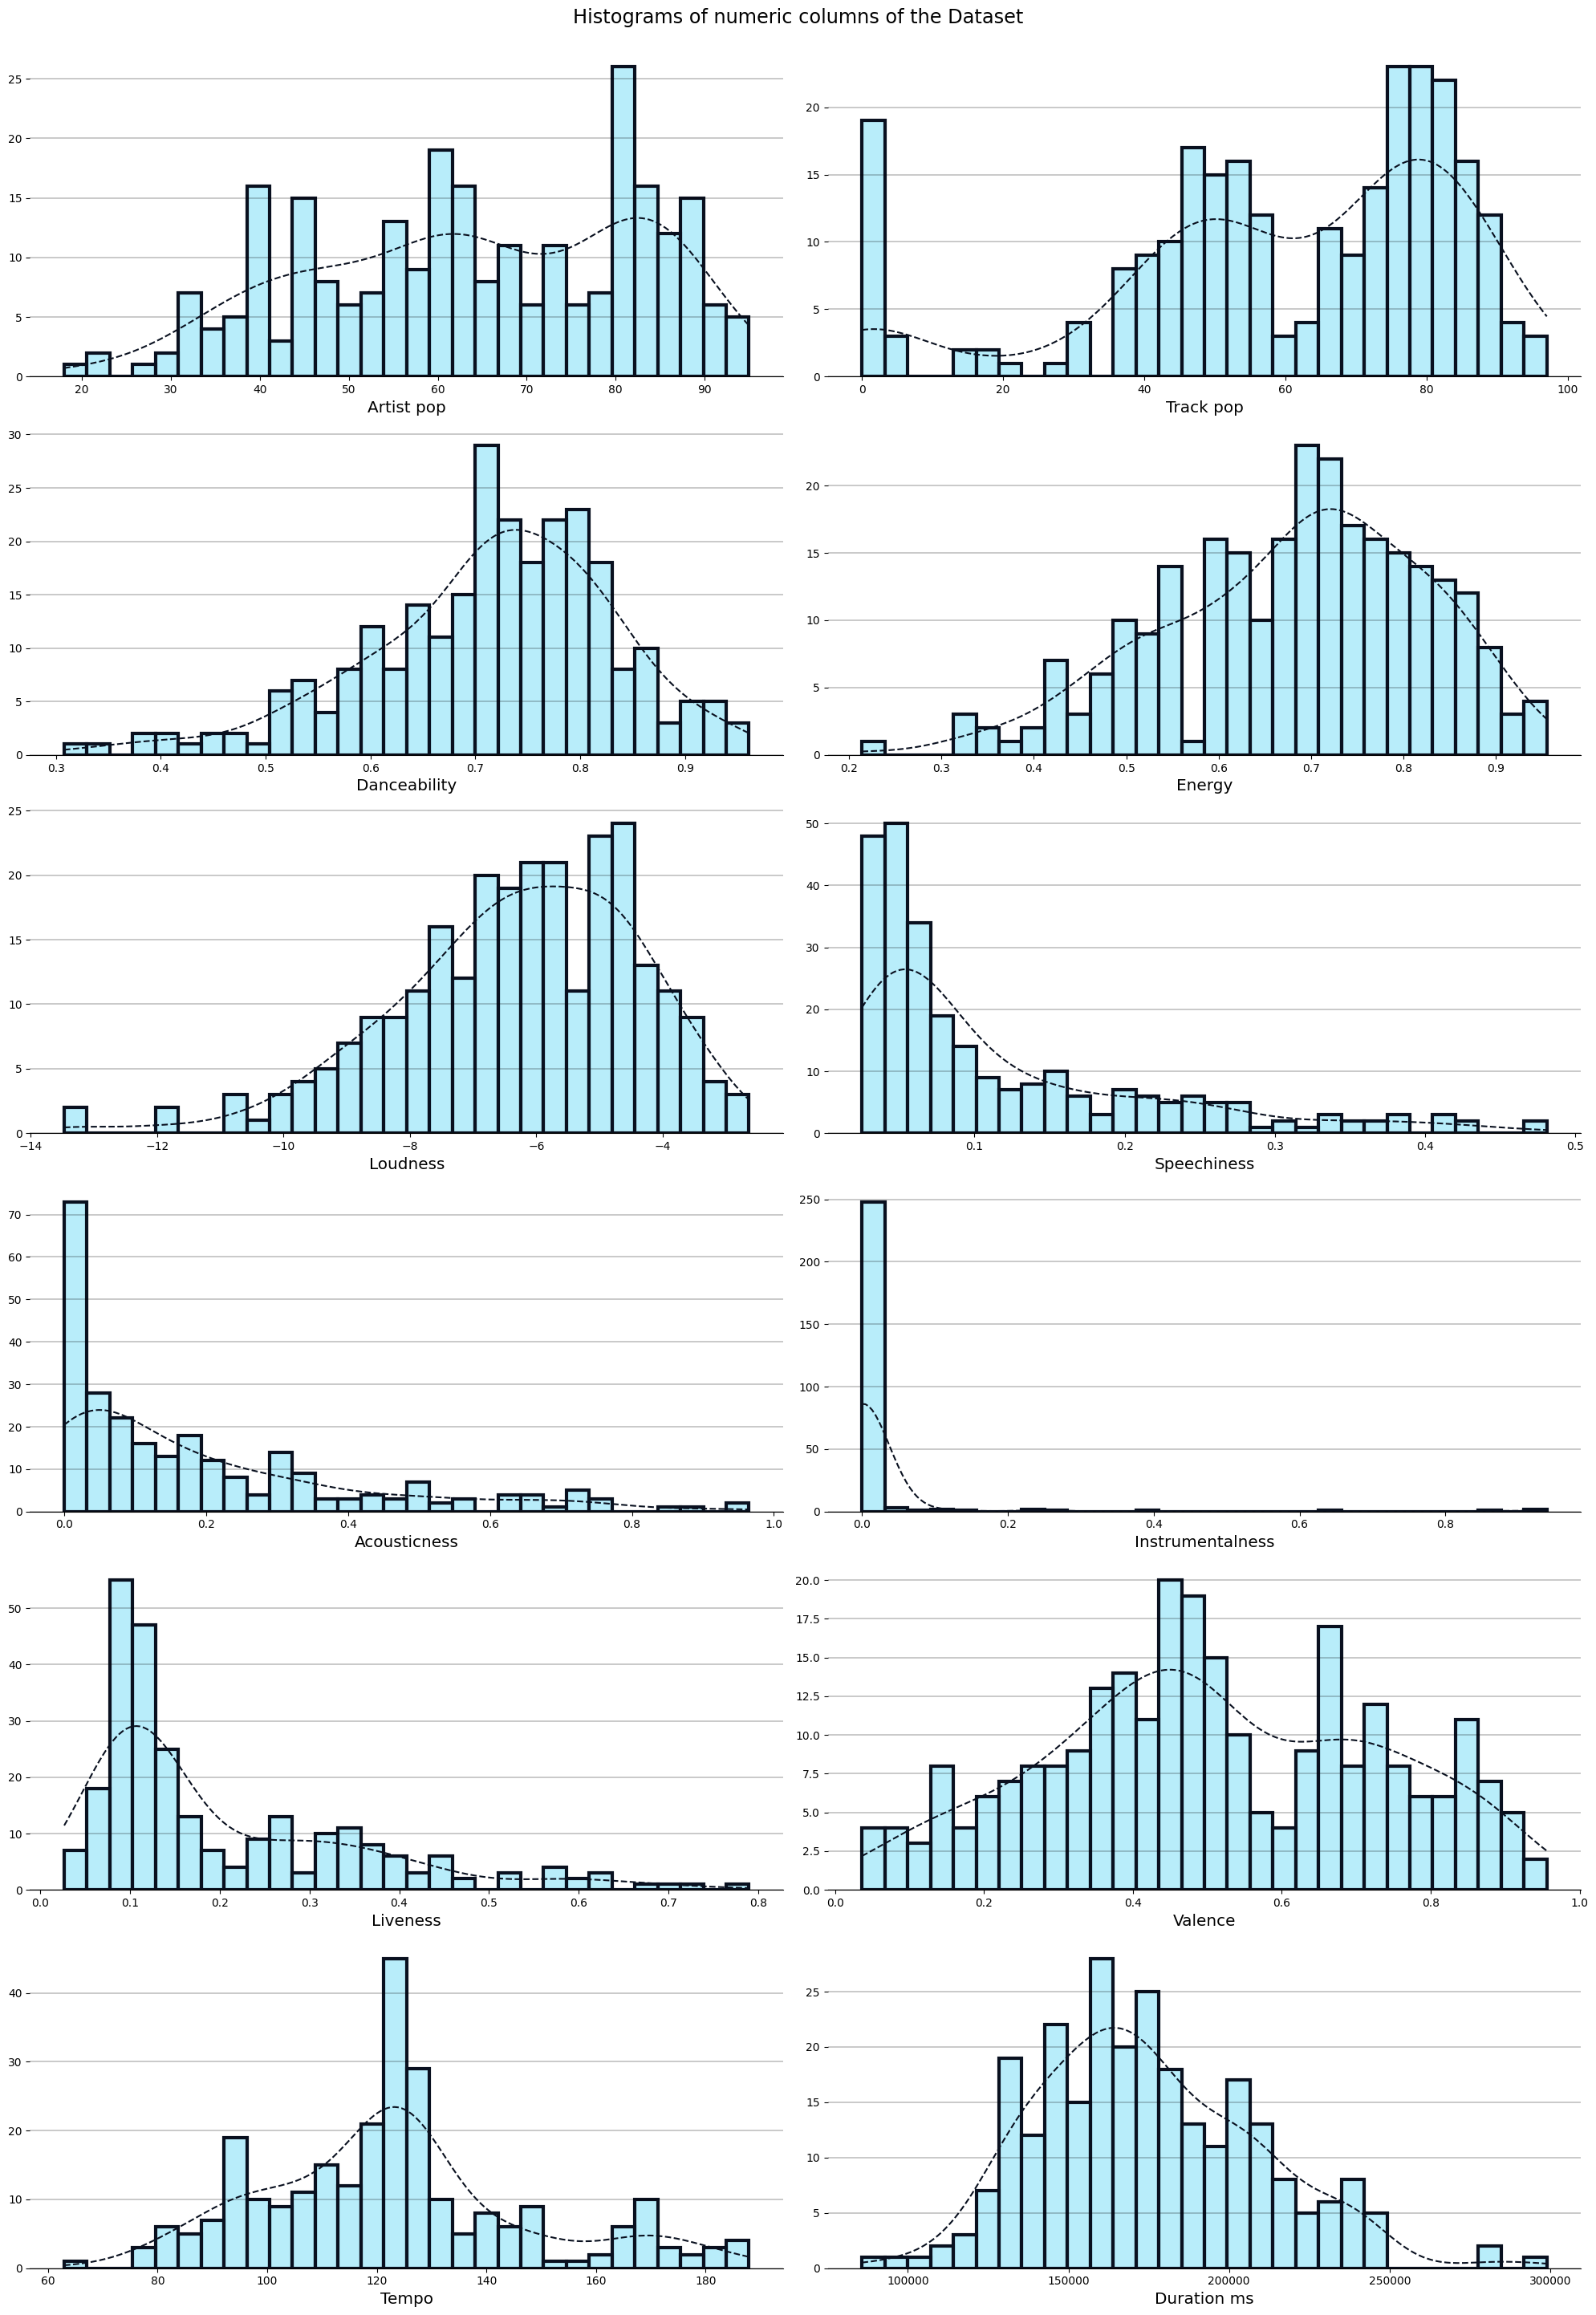

In [ ]:
cols = ['artist_pop', 'track_pop', 'danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(6, 2, figsize=(20, 30))

for i, col in enumerate(cols):

    row_index = i // 2
    col_index = i % 2

    hist(df, col, axs[row_index][col_index])

fig.suptitle("Histograms of numeric columns of the Dataset", fontsize="xx-large", y=0.96)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

<h3>🕵What can we notice?</h3>

1. In the variable '*track_pop*', which I remember being our main target, there is a spike on 0. This probably means that for such tracks we have missing data, which we will have to either eliminate or replace with the column average.

2. '*Loudness*' is the only feature with negative values

3. '*Instrumentalness*' has almost all values on the 0: it probably adds little information in the data, and we can consider eliminating that column for ML modeling in order to reduce features.

Let us now go on to create a function to visualize the distribution of the **categorical variables** (which are also in numerical form), and plot the graph

In [ ]:
def count(df, x, ax, main_color=colors[2], second_color=colors[0]):

    ax.bar(df[x].value_counts().index, df[x].value_counts().values,
           color=main_color, edgecolor=second_color, linewidth=3)

    set_style(ax)

    ax.set_xlabel(x.replace("_", " ").capitalize(), fontsize="x-large")
    ax.set_ylabel("")


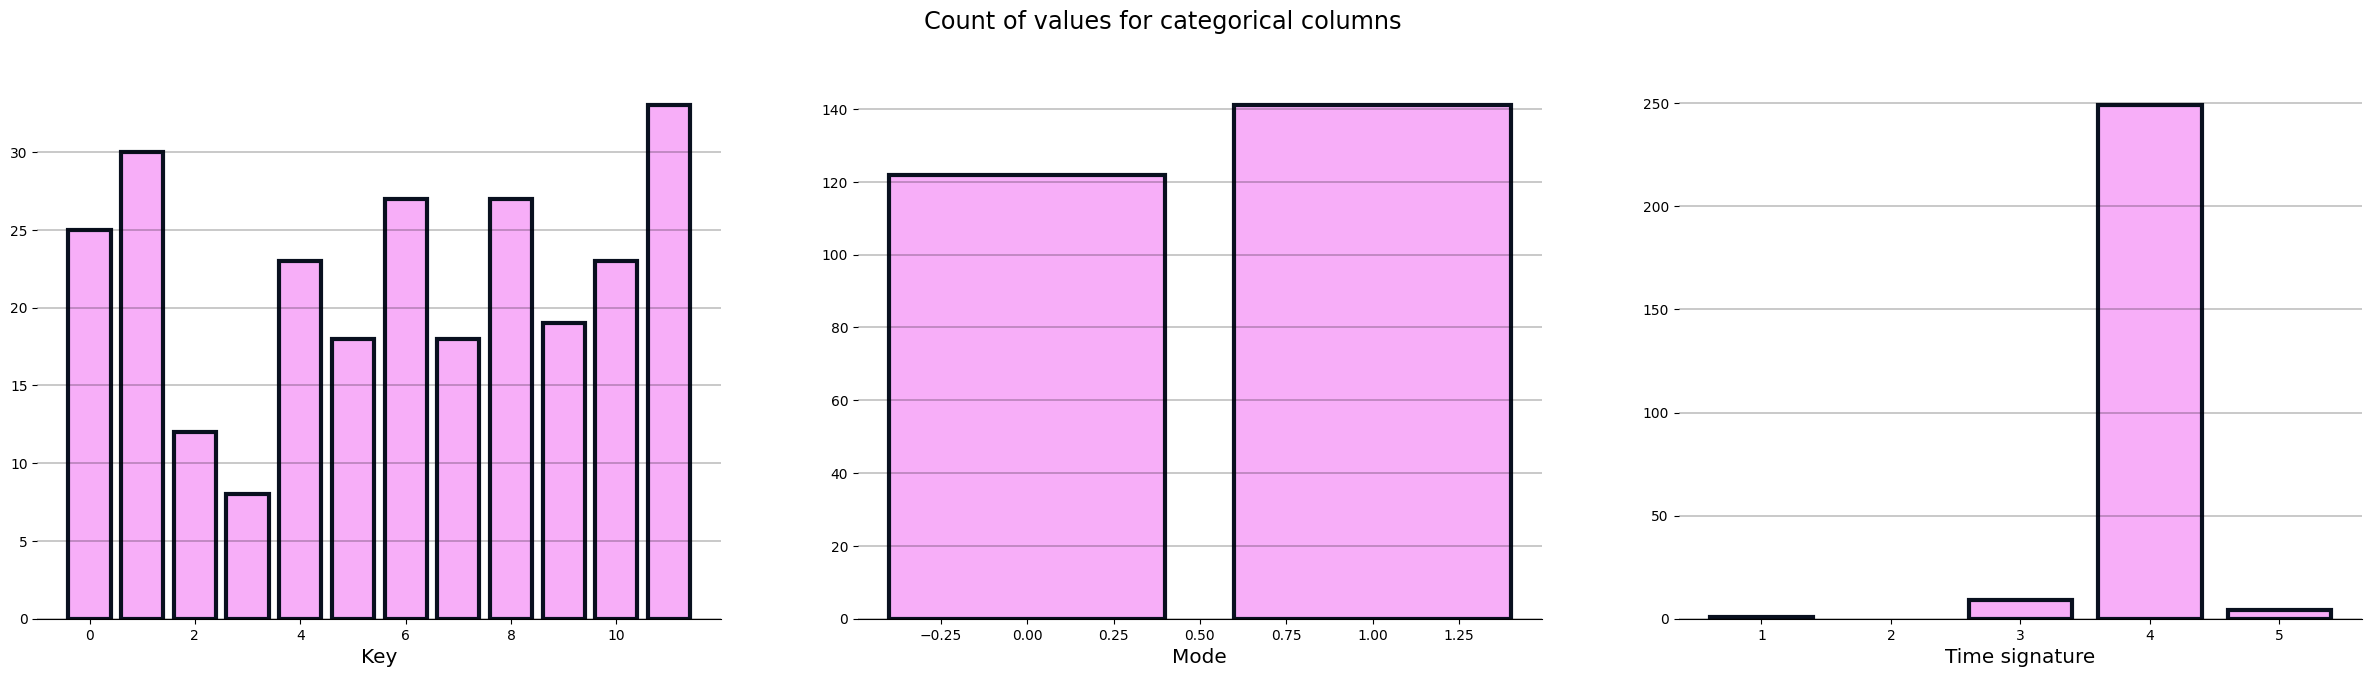

In [ ]:
cols = ['key', 'mode', 'time_signature']


fig, ax = plt.subplots(1, 3, figsize=(30, 7))

for i, col in enumerate(cols):

    count(df, col, ax[i])

fig.suptitle("Count of values for categorical columns", size="xx-large")

plt.show()

We immediately notice that the 'key' column has a relatively even distribution, 'mode' is divided almost equally, with a slight advantage of value 1, while 'time signature' is almost entirely made up of value 4.

<a id="Correlation with track_pop"></a>
<h1 style="text-align:center">↗️Correlation with <i style="background-color:#FCDDFC">track_pop</i></h1>

This variable is the main one in the dataset and is the major object of interest. It will also be the target in the Machine Learning models that we will implement shortly. It is therefore important to prioritize it and check for correlations with the other variables.

As anticipated, we will first go to replace the song popularity values with the column average.

In [ ]:
df.loc[df["track_pop"] == 0,'track_pop'] = df['track_pop'].mean()

We define a function to look for linear correlations between columns

In [ ]:
def scatter(df, x, y, ax, main_color=colors[1], second_color=colors[0]):

    sns.regplot(data=df, x=x, y=y, ax=ax,
                 color=main_color, ci=75,
                scatter_kws={
                    'edgecolor':second_color,
                    'linewidth':1.5,
                    's':50
                },
                line_kws={
                    'color':colors[2],
                    'linewidth':3,
                }
               )
    ax.set_xlabel(x.replace("_", " ").capitalize())
    ax.set_ylabel(y.replace("_", " ").capitalize())

    sns.despine(ax=ax)
    ax.grid(axis='x')

The correlation that is likely to be strongest is with the popularity of the artist. We are therefore going to plot that graph first and later consider all the other features.

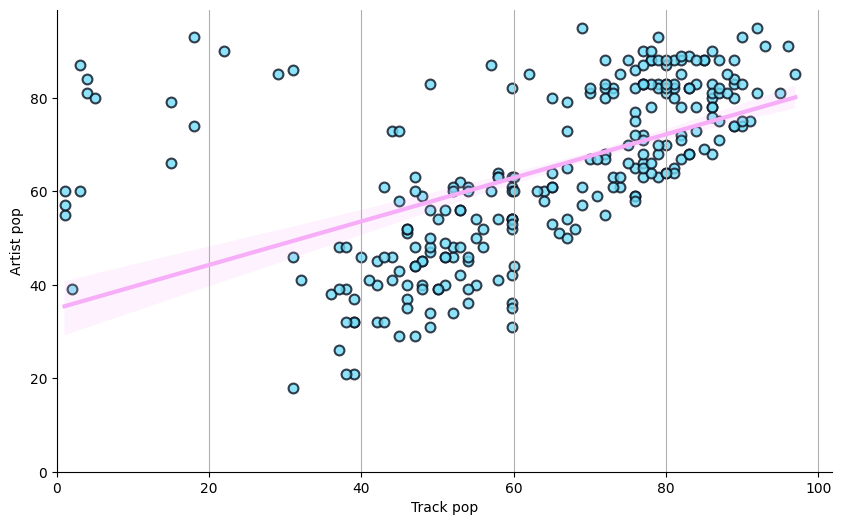

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

scatter(df, 'track_pop', 'artist_pop', ax)

ax.set_ylim(bottom=0)
ax.set_xlim(left=0)

plt.show()

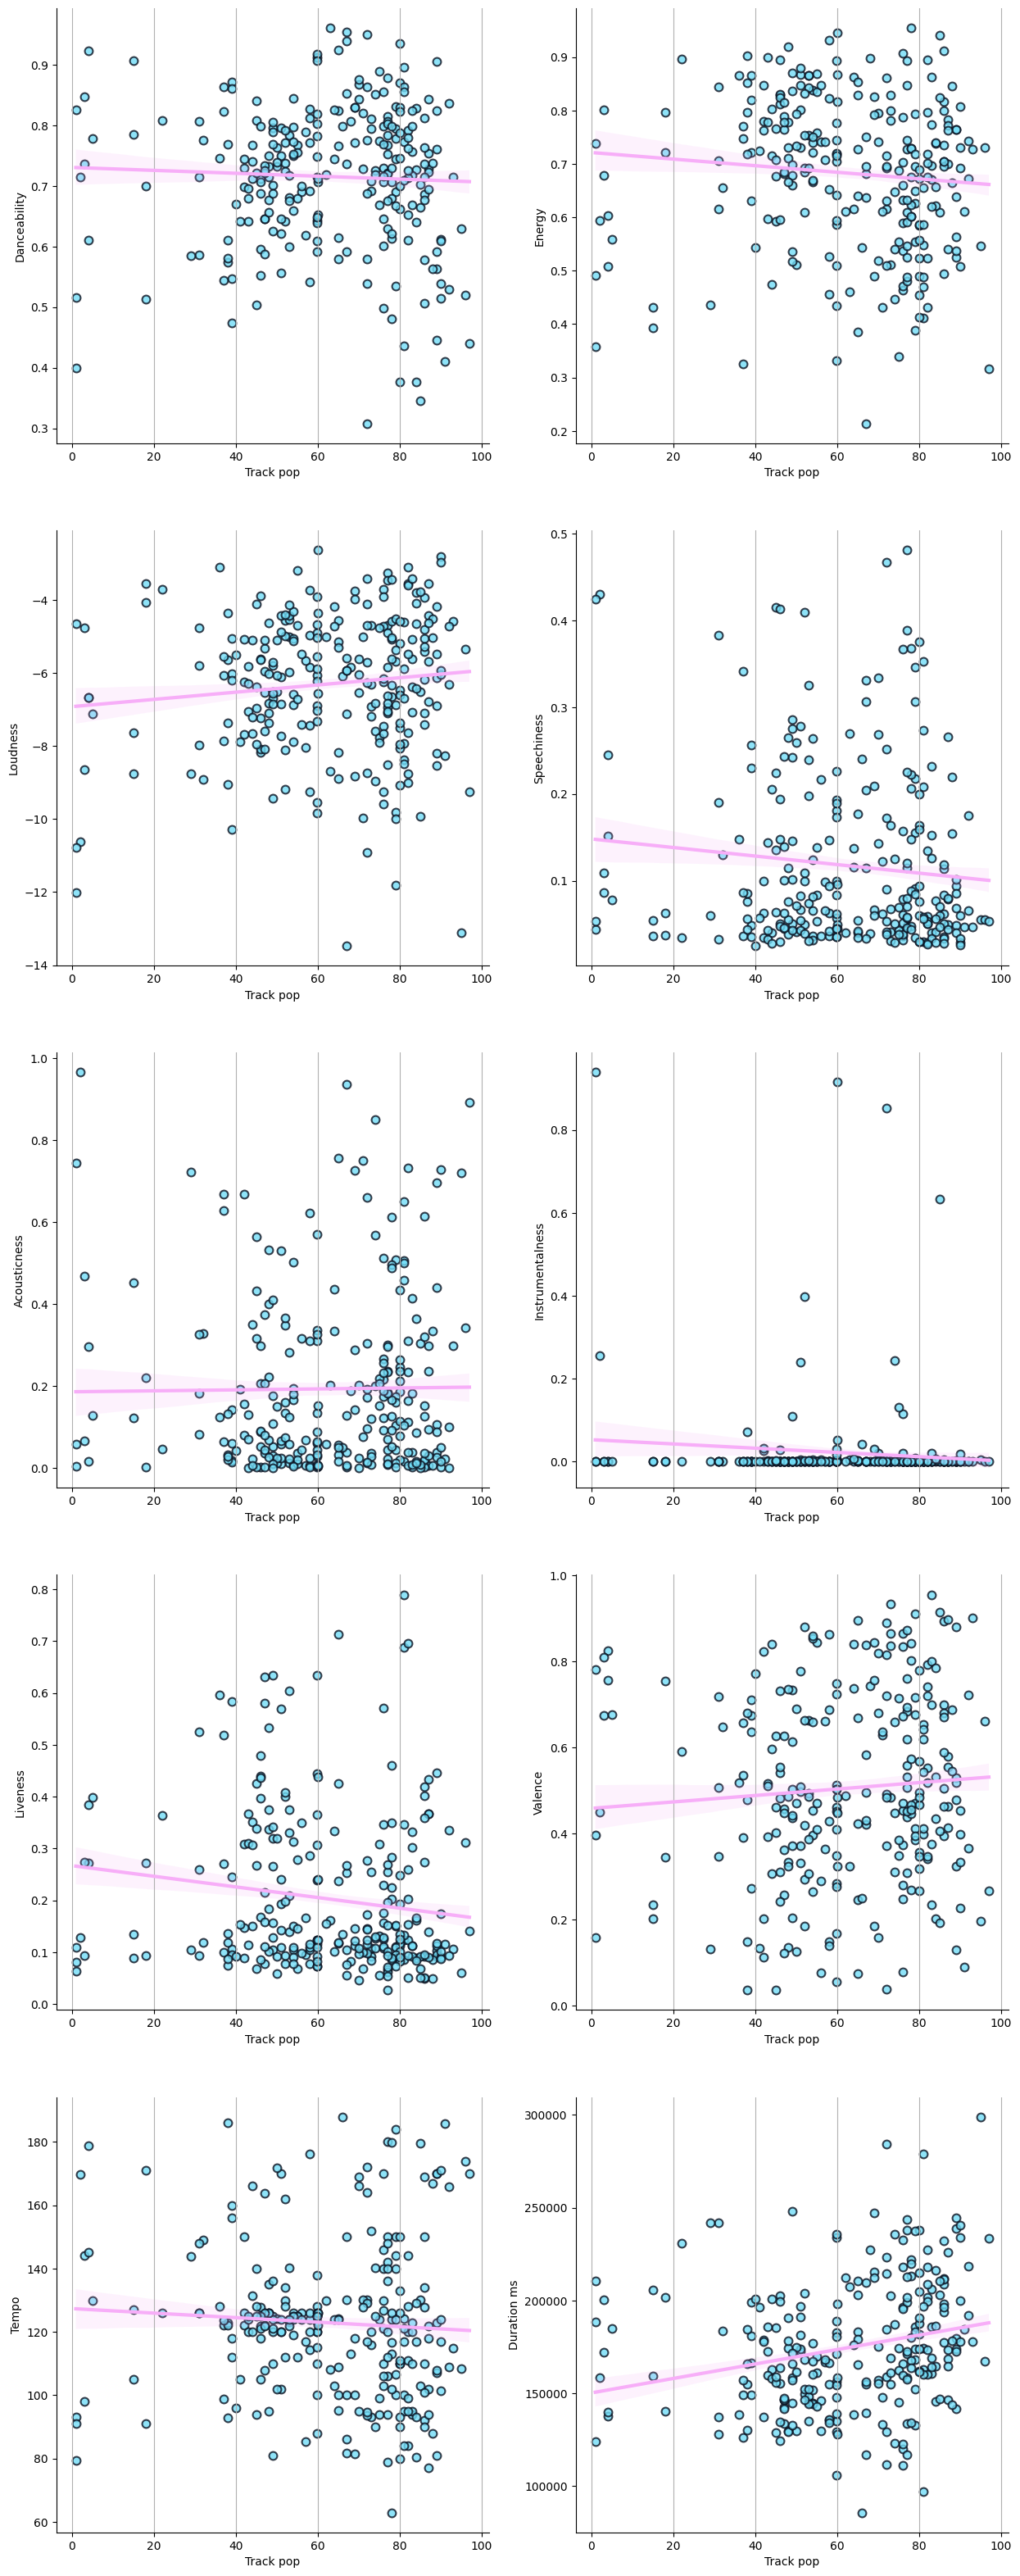

In [ ]:
cols = ['danceability', 'energy', 'loudness', 'speechiness','acousticness',
        'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

fig, axs = plt.subplots(5, 2, figsize=(15, 40))

for i, col in enumerate(cols):

    row_index = i // 2
    col_index = i % 2

    ax = axs[row_index][col_index]

    scatter(df, 'track_pop', col, ax)


plt.show()


As expected, the strongest linear correlation between the popularity of the song and the other features is with the popularity of the artist.

With the rest of the columns, the correlations are weak or almost nonexistent.

Let us finally visualize the correlation between song popularity and categorical columns.

In [ ]:
def stripplot(df, x, y, ax, palette=[colors[1], colors[2]]):

    sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
                 linewidth=2, size=8)

    set_style(ax)

<ipython-input-15-e5e079d9cd8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
<ipython-input-15-e5e079d9cd8b>:3: UserWarning: 
The palette list has fewer values (2) than needed (12) and will cycle, which may produce an uninterpretable plot.
  sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
<ipython-input-15-e5e079d9cd8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x=x, y=y, palette=palette, ax=ax,
<ipython-input-15-e5e079d9cd8b>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.

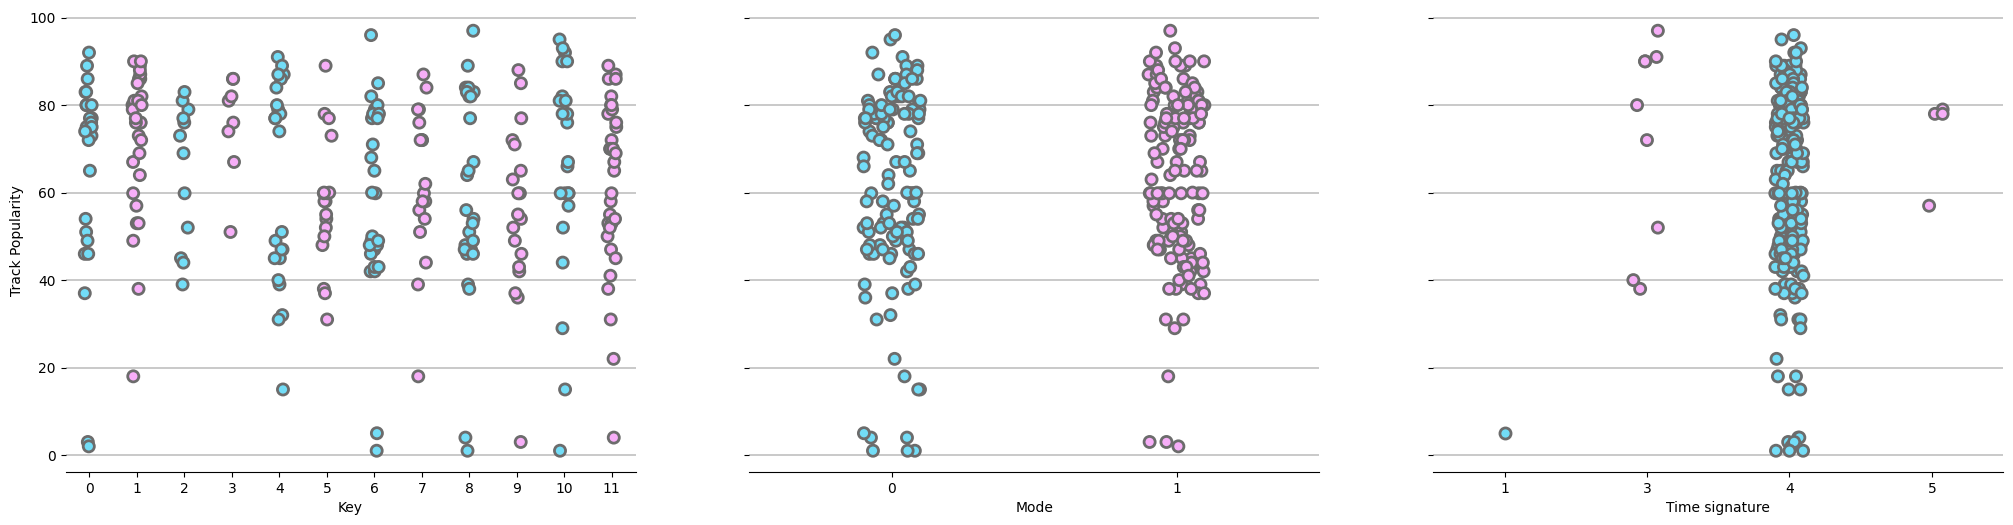

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(25, 6), sharey=True)

for i, col in enumerate(['key', 'mode', 'time_signature']):

    stripplot(df, col, 'track_pop', axs[i])

    axs[i].set(
        xlabel=col.replace("_", " ").capitalize(),
        ylabel="Track Popularity"
    )

plt.show()

There seems to be no obvious imbalance between the distribution of song popularity and the value of categorical columns.

<h2 style="text-align:center">🏁What correlations are there between all the columns?</h2>

Let's write a function for a correlation map and find out.

In [ ]:
def corr_map(df, ax, palette, edgecolor=colors[0]):

    corr = df.corr()

    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor=edgecolor,
               vmin=-1, vmax=1, fmt=".2f")


There seems to be no obvious imbalance between the distribution of song popularity and the value of categorical columns.

<h2 style="text-align:center">🏁What correlations are there between all the columns?</h2>

Let's write a function for a correlation map and find out.

In [ ]:
def corr_map(df, ax, palette, edgecolor=colors[0]):

    corr = df.corr()

    sns.heatmap(corr, annot=True, ax=ax,
               cmap=palette, square=True, linewidth=.5, linecolor=edgecolor,
               vmin=-1, vmax=1, fmt=".2f")


There are no particularly strong correlations.

In addition to the aforementioned correlation between song popularity and artist popularity, there is a discrete linear relationship between track duration and artist popularity, and an inverse relationship between energy and acousticness

<a id="Best Artists and traks"></a>
<h1 style="text-align:center">🎶Who are the best artists and most popular tracks?</h1>

We analyze the data to find out:

1. The 3 most popular artists
2. The 3 artists who created the most hits
3. The 5 most popular tracks


In [ ]:
# 1 - Top 3 artists for popularity

artists_pop_sorted = df.loc[:, ['artist_name', 'artist_pop']].drop_duplicates('artist_name').sort_values('artist_pop', ascending=False)

artists_pop_sorted[:3]

,artist_name,artist_pop
220,Drake,95
114,The Weeknd,93
1,Harry Styles,91


**Drake** is the most popular artist according to this dataset, followed by **The Weeknd** and **Harry Styles**.

But will they be the singers with the most hits on tiktok in 2022? **Let's find out**.

In [ ]:
# 2 - Top 3 artists with more hits on tiktok in 2022

artists_top_hits = df['artist_name'].value_counts(ascending=False)

artists_top_hits[:3]

artist_name
Doja Cat     8
Coopex       6
Dame Dame    5
Name: count, dtype: int64

Wow! None of the 3 popular artists mentioned above appear in the top 3 artists by number of hits. Leading the way is definitely **Doja Cat**, with no less than *8 tracks*!
In second place is **Coopex**, with 6 hits, and in third place is **Dame Dame**, with 5.

In [ ]:
# 3 - Top 5 track for popularity

tracks_pop_sorted = df.loc[:, ['track_name', 'track_pop']].sort_values('track_pop', ascending=False)

tracks_pop_sorted[:5]

,track_name,track_pop
5,Glimpse of Us,97.0
1,As It Was,96.0
0,Running Up That Hill (A Deal With God),95.0
52,Late Night Talking,93.0
260,Jimmy Cooks (feat. 21 Savage),92.0


The most popular song, with 97 points out of 100, is **Glimpse of Us** 🐉!

<a id="its-time-to-predict"><a/>
<h1 style="text-align:center">🔮It's time to predict!</h1>

<h2>⌨️Preprocessing</h2>

We create and manipulate the data so that it is usable correctly by the models we are going to use:

1. We divide X and y into train set and test set

2. We create scaled data sets, since some models require it

3. We import the function that will allow us to assess the quality of our model, namely *mean_squared_error*

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop(['track_pop', 'track_name', 'album', 'artist_name', 'instrumentalness'], axis=1).values
y = df['track_pop'].values

SEED = 15

In [ ]:
bin_numbers = pd.qcut(
    x=y, q=5, labels=False, duplicates='drop'
)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.25,
                                                    stratify=bin_numbers)

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as MSE

ss = StandardScaler()

ss.fit(X)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)

Finally, before we start the actual modeling, we create a function that allows us to evaluate the error trend on train_set and test_set depending on the value of a parameter.

In [ ]:
def error_plot(x_parameter, train_rmse, test_rmse, ax,
               xlabel=None, title=None, xscale='linear', xlim=None,
               train_color=colors[1], test_color=colors[2], train_std=None):

    # I use a double plot for train and test in order to give a black border effect to the line, which is otherwise not feasible.
    ax.plot(x_parameter, train_rmse, color="black", linewidth=4,  marker="o")
    ax.plot(x_parameter, train_rmse, label='Train', color=train_color, linewidth=3,  marker="o")

    ax.plot(x_parameter, test_rmse, color="black", linewidth=4, marker="o")
    ax.plot(x_parameter, test_rmse, label='Test', color=test_color, linewidth=3, marker="o")

    if train_std:
        ax.fill_between(x_parameter,
                        np.add(train_rmse, train_std), # train rmse + train std
                        np.add(train_rmse, -np.array(train_std)), # train rmse - train std
                        alpha=0.05, color=train_color)

    ax.set(xlabel=xlabel, ylabel='RMSE', xscale=xscale, xlim=xlim, ylim=0, title=title)
    set_style(ax)

    ax.legend()

<h3 style="text-align:center">↖️Model 1 - SVR</h3>

We now use Support Vector Regressor as the second model, and perform a search for the best hyperparameters using *GridSearchCV*

In [ ]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

param_grid = {
            'C': [0.1, 1, 10, 100],
            'gamma': [1,0.1,0.01,0.001],
            'kernel': ['rbf', 'poly', 'sigmoid']
            }

svr = SVR()

svr_gs = GridSearchCV(
    svr, param_grid,
    cv=4, n_jobs=-1, verbose=1, scoring="neg_mean_absolute_error"
)

svr_gs.fit(X_train_scaled, y_train)

print(f"Best Parameters -> {svr_gs.best_params_ }")

print(f"Best Score -> {-round(svr_gs.best_score_,2)}")

Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score -> 11.34


The results on the train set are not bad for the train set. We now transfer the search results to a DataFrame and plot the relationships between parameters.

In [ ]:
svr_df = pd.DataFrame(svr_gs.cv_results_)

svr_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003990,0.001270,0.001596,0.000232,0.1,1,rbf,"{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}",-17.832507,-15.912283,-15.165628,-19.741241,-17.162915,1.778297,35
1,0.010210,0.000637,0.001025,0.000036,0.1,1,poly,"{'C': 0.1, 'gamma': 1, 'kernel': 'poly'}",-20.973862,-13.870939,-15.336703,-25.484733,-18.916559,4.627285,42
2,0.004322,0.000650,0.001816,0.000653,0.1,1,sigmoid,"{'C': 0.1, 'gamma': 1, 'kernel': 'sigmoid'}",-15.872080,-13.842573,-13.414683,-18.334569,-15.365976,1.949166,15
3,0.003099,0.000394,0.001464,0.000087,0.1,0.1,rbf,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}",-17.593834,-15.664991,-14.969581,-19.524827,-16.938308,1.776022,23
4,0.003132,0.000883,0.000984,0.000043,0.1,0.1,poly,"{'C': 0.1, 'gamma': 0.1, 'kernel': 'poly'}",-17.389812,-15.574620,-14.811171,-19.125778,-16.725345,1.672709,21


In [ ]:
svr_df["mean_test_score"] = -svr_df["mean_test_score"]

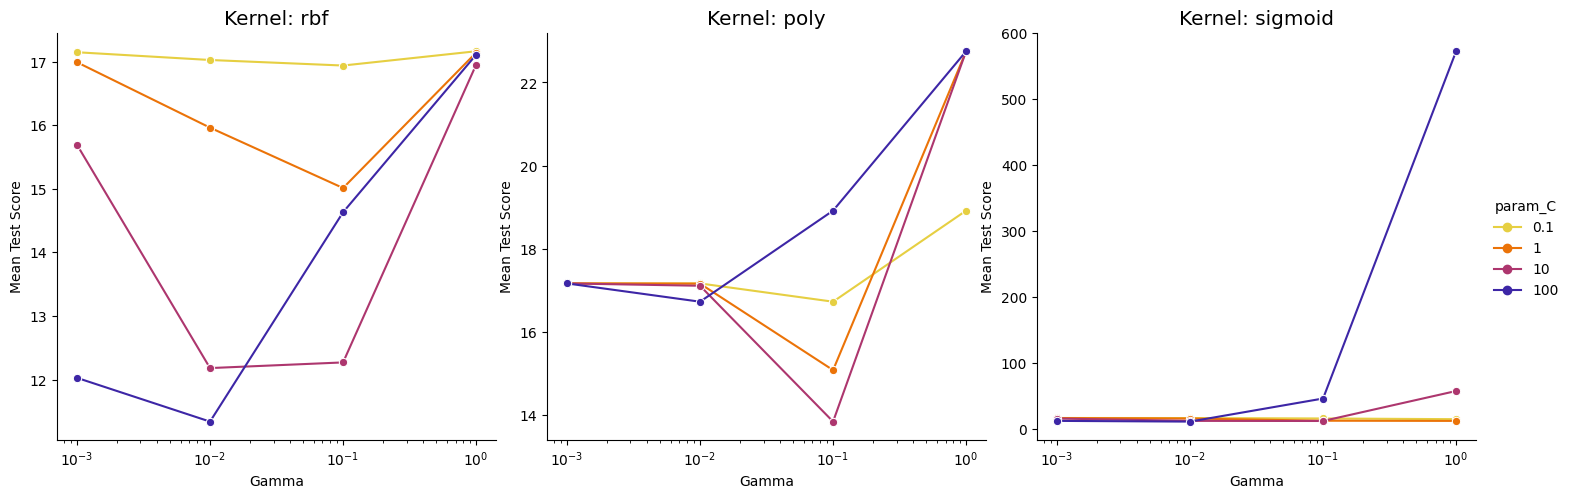

In [ ]:
params_palette = sns.color_palette("CMRmap_r", n_colors=4)

g = sns.relplot(data=svr_df, x="param_gamma", y="mean_test_score", hue="param_C", col="param_kernel",
                kind="line", facet_kws={"sharey":False},
                palette=params_palette, marker="o")

g.set(xscale="log", xlabel="Gamma", ylabel="Mean Test Score")
g.set_titles(col_template="Kernel: {col_name}", size="x-large")

plt.show()

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


In [ ]:
# Remplacez df par votre DataFrame
X = df.drop(['track_pop', 'track_name', 'album', 'artist_name', 'instrumentalness'], axis=1).values
y = df['track_pop'].values

SEED = 15
bin_numbers = pd.qcut(y, q=5, labels=False, duplicates='drop')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=SEED, test_size=0.25, stratify=bin_numbers)

ss = StandardScaler()
ss.fit(X)

X_train_scaled = ss.transform(X_train)
X_test_scaled = ss.transform(X_test)


In [ ]:
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [1, 0.1, 0.01, 0.001],
    'kernel': ['rbf', 'poly', 'sigmoid']
}

svr = SVR()

svr_gs = GridSearchCV(
    svr, param_grid,
    cv=4, n_jobs=-1, verbose=1, scoring="neg_mean_absolute_error"
)

svr_gs.fit(X_train_scaled, y_train)

print(f"Best Parameters -> {svr_gs.best_params_ }")
print(f"Best Score -> {-round(svr_gs.best_score_, 2)}")

svr_df = pd.DataFrame(svr_gs.cv_results_)
svr_df["mean_test_score"] = -svr_df["mean_test_score"]


Fitting 4 folds for each of 48 candidates, totalling 192 fits
Best Parameters -> {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}
Best Score -> 11.34


In [ ]:
# Prédiction sur l'ensemble de test
y_pred_continuous = svr_gs.best_estimator_.predict(X_test_scaled)

# Définir un seuil pour convertir les prédictions continues en classes discrètes
threshold = np.median(y_train)  # Exemple de seuil basé sur la médiane de y_train
y_pred_classes = (y_pred_continuous >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)

# Calcul des métriques de classification
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)


Accuracy: 0.8484848484848485
Precision: 0.8064516129032258
Recall: 0.8620689655172413
F1-score: 0.8333333333333334
Confusion Matrix:
[[31  6]
 [ 4 25]]


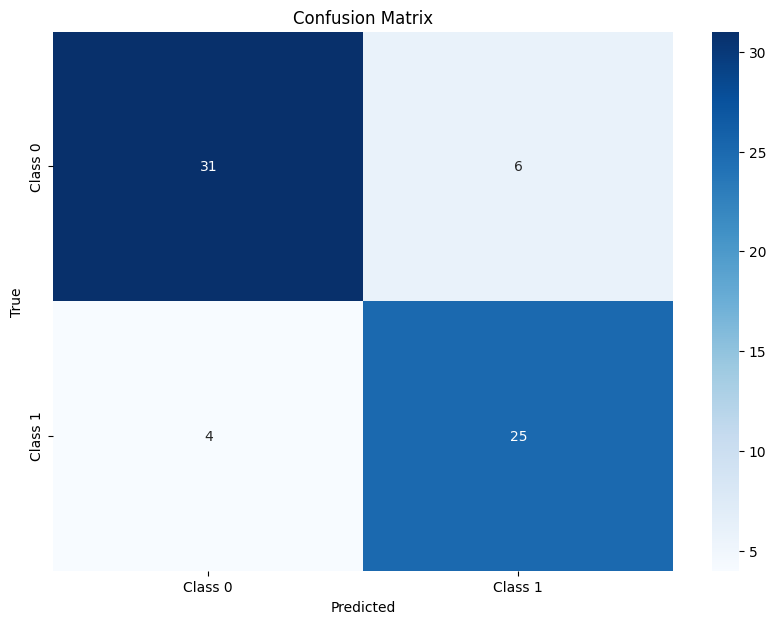

<ipython-input-34-5cf1357c1cf9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


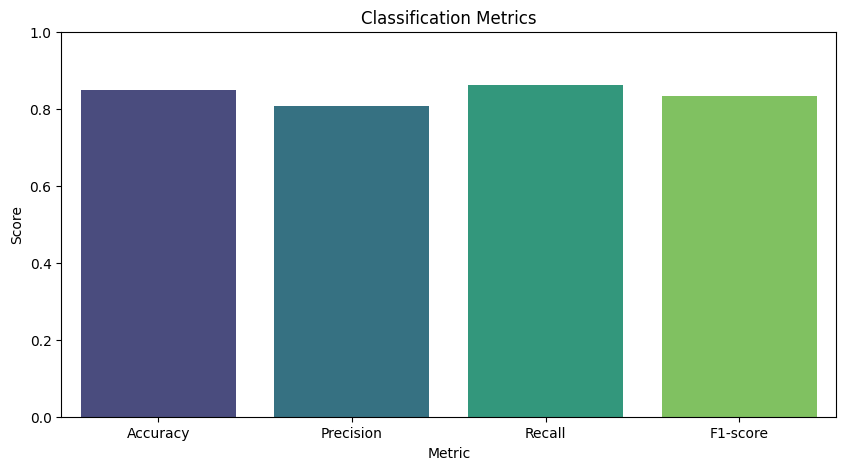

In [ ]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(conf_matrix, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Affichage de la matrice de confusion
labels = ['Class 0', 'Class 1']  # Remplacez par les noms réels des classes si disponible
plot_confusion_matrix(conf_matrix, labels)

# Visualisation des métriques
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
           'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Classification Metrics')
plt.show()


Classification Metrics:
      Metric     Score
0   Accuracy  0.848485
1  Precision  0.806452
2     Recall  0.862069
3   F1-score  0.833333

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           31            6
Actual 1            4           25


<ipython-input-35-012e05985efa>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', ax=axes[1])


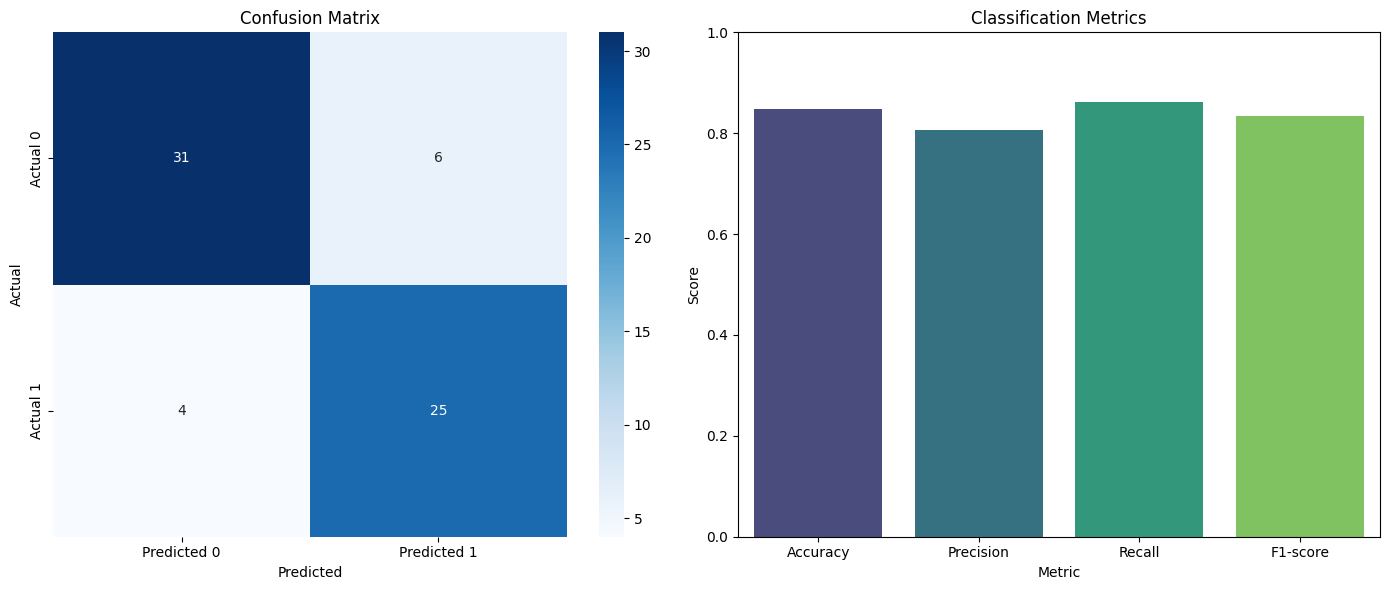

In [ ]:
# Créer un DataFrame pour les métriques
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
           'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics)

# Affichage des métriques
print("Classification Metrics:")
print(metrics_df)

# Affichage de la matrice de confusion
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nConfusion Matrix:")
print(conf_matrix_df)

# Visualisation des métriques et de la matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Visualisation des métriques
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title('Classification Metrics')

plt.tight_layout()
plt.show()


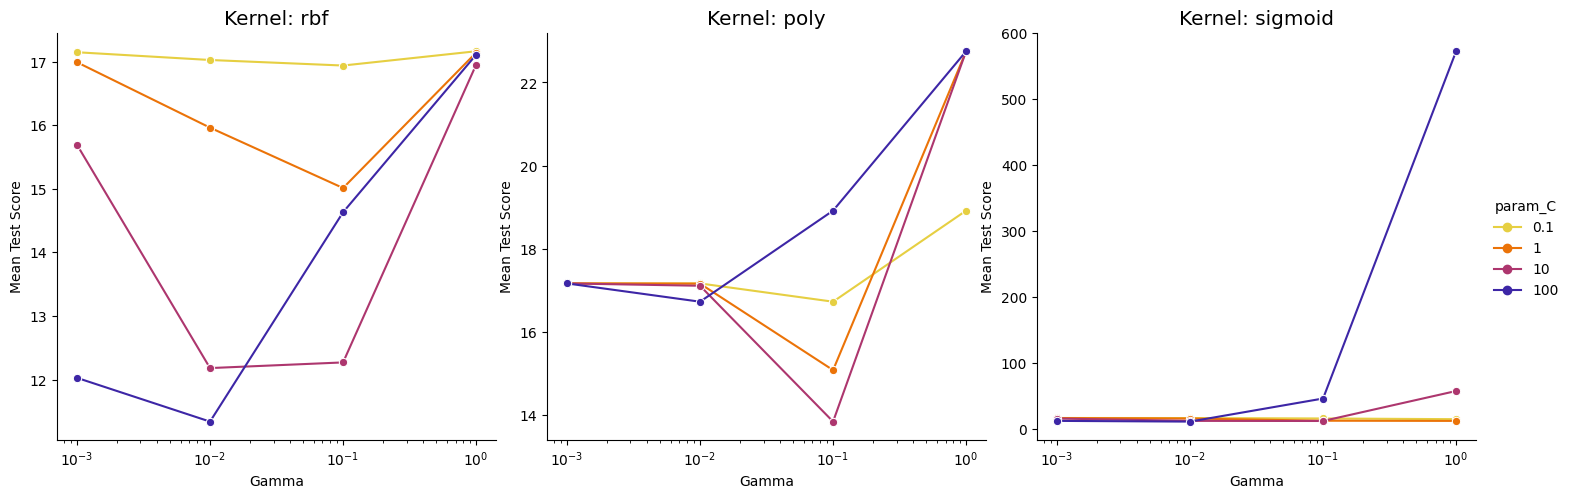

In [ ]:
params_palette = sns.color_palette("CMRmap_r", n_colors=4)

g = sns.relplot(data=svr_df, x="param_gamma", y="mean_test_score", hue="param_C", col="param_kernel",
                kind="line", facet_kws={"sharey": False},
                palette=params_palette, marker="o")

g.set(xscale="log", xlabel="Gamma", ylabel="Mean Test Score")
g.set_titles(col_template="Kernel: {col_name}", size="x-large")

plt.show()


In [ ]:
best_svr_est = svr_gs.best_estimator_

best_svr_est.fit(X_train_scaled, y_train)

y_pred_train = best_svr_est.predict(X_train_scaled)
y_pred_test = best_svr_est.predict(X_test_scaled)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")





Train RMSE -> 16.699896229794177
Test RMSE -> 16.901416035596892


The best model turns out to be the one with the "rbf" kernel, gamma equal to 0.01 and C equal to 100.

The prediction results on training and testing are similar to each other, indicating the absence of overfitting, and slightly better than Lasso's model.

<h3 style="text-align:center">🌲🌲Model 2 - Gradient Boosting</h3>

As a last model, we are going to try, with RandomizedSearchCV, the GradientBoostingRegressor.

<div style="background-color:#239AA9; color:white; text-align:center; padding:10px; font-size:1em; border-radius:1em">
In the gray of parameters I am not going to iterate max_depth, to which I will give the value 1 in a fixed way, in when with so little data GradientBoosting tends to go into strong overfitting if it has max_depth of greater value. </div>

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np


In [ ]:
params_grid = {
    "learning_rate":np.arange(0.1, 0.5, 0.05),
    "n_estimators":np.arange(40, 201, 20),
    "subsample":np.arange(0.4, 1.01, 0.1),
    "min_samples_split":np.arange(2, 10, 1),
    "min_samples_leaf":np.arange(2, 10, 1)
}
est = GradientBoostingRegressor(random_state=SEED, max_depth=1)

In [ ]:
gb_rs = RandomizedSearchCV(
    estimator=est,
    param_distributions=params_grid,
    n_iter=50,
    cv=3,
    scoring="neg_mean_absolute_error",
    n_jobs=-1,
    verbose=1,
    random_state=SEED
)

In [ ]:
gb_rs.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3,
                   estimator=GradientBoostingRegressor(max_depth=1,
                                                       random_state=15),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': array([0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45]),
                                        'min_samples_leaf': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'min_samples_split': array([2, 3, 4, 5, 6, 7, 8, 9]),
                                        'n_estimators': array([ 40,  60,  80, 100, 120, 140, 160, 180, 200]),
                                        'subsample': array([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
                   random_state=15, scoring='neg_mean_absolute_error',
                   verbose=1)

In [ ]:
print(f"Best Parameters -> {gb_rs.best_params_ }")

print(f"Best Score -> {-round(gb_rs.best_score_,2)}")

Best Parameters -> {'subsample': 0.9999999999999999, 'n_estimators': 40, 'min_samples_split': 5, 'min_samples_leaf': 7, 'learning_rate': 0.1}
Best Score -> 12.64


In [ ]:
y_pred_continuous = gb_rs.best_estimator_.predict(X_test)

In [ ]:
threshold = np.median(y_train)
y_pred_classes = (y_pred_continuous >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)

In [ ]:
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)


print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.8787878787878788
Precision: 0.8620689655172413
Recall: 0.8620689655172413
F1-score: 0.8620689655172413
Confusion Matrix:
[[33  4]
 [ 4 25]]


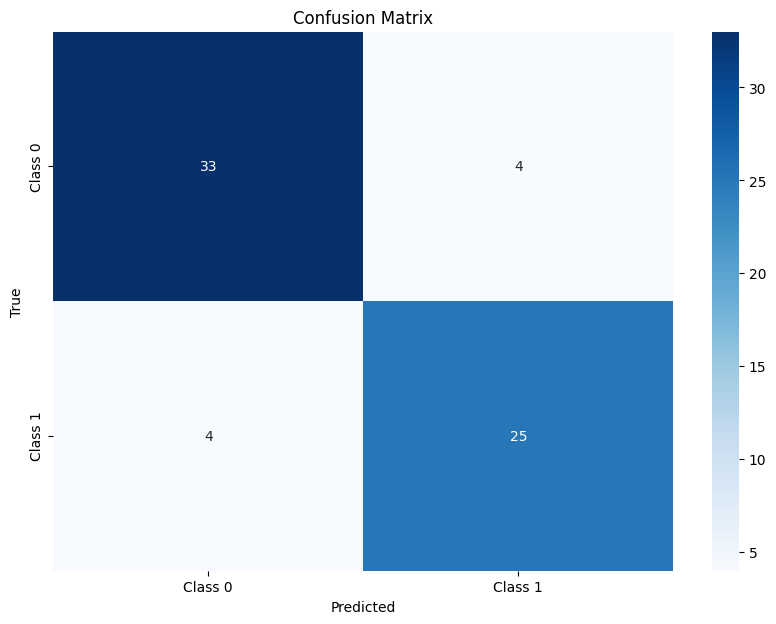

<ipython-input-47-5cf1357c1cf9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


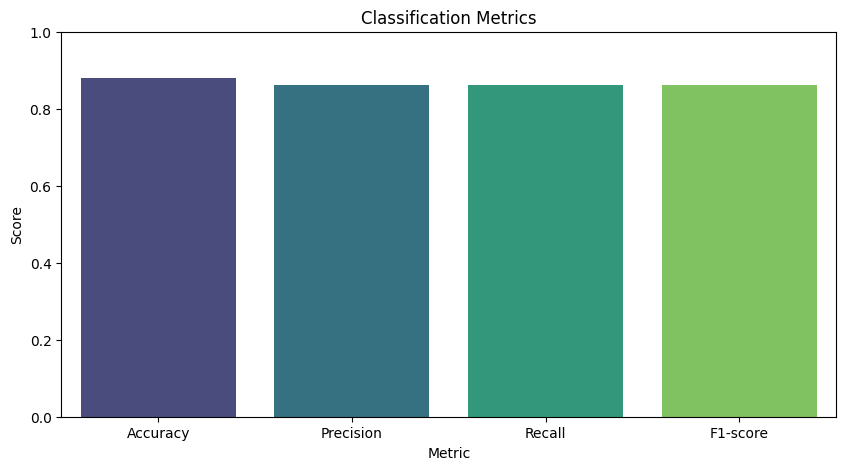

In [ ]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(conf_matrix, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Affichage de la matrice de confusion
labels = ['Class 0', 'Class 1']  # Remplacez par les noms réels des classes si disponible
plot_confusion_matrix(conf_matrix, labels)

# Visualisation des métriques
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
           'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Classification Metrics')
plt.show()

Classification Metrics:
      Metric     Score
0   Accuracy  0.878788
1  Precision  0.862069
2     Recall  0.862069
3   F1-score  0.862069

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           33            4
Actual 1            4           25


<ipython-input-48-012e05985efa>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', ax=axes[1])


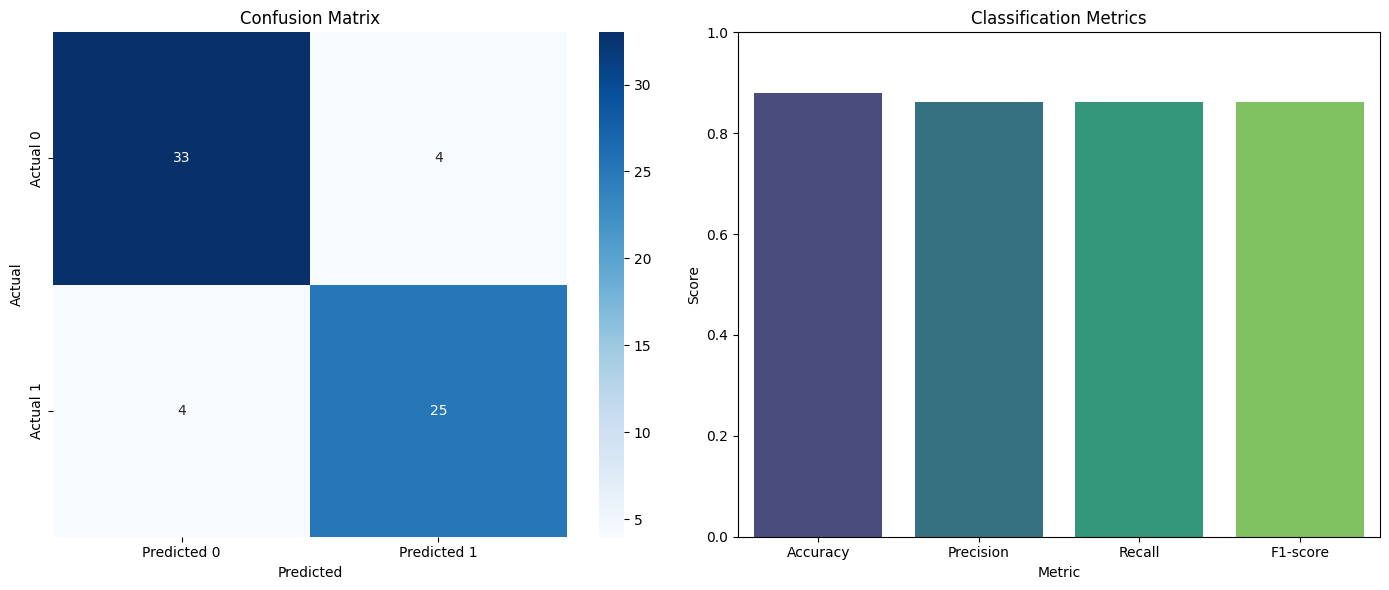

In [ ]:
# Créer un DataFrame pour les métriques
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
           'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics)

# Affichage des métriques
print("Classification Metrics:")
print(metrics_df)

# Affichage de la matrice de confusion
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nConfusion Matrix:")
print(conf_matrix_df)

# Visualisation des métriques et de la matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Visualisation des métriques
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title('Classification Metrics')

plt.tight_layout()
plt.show()

In [ ]:
best_estimator = gb_rs.best_estimator_

best_estimator.fit(X_train, y_train)

y_pred_train = best_estimator.predict(X_train)
y_pred_test = best_estimator.predict(X_test)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")

Train RMSE -> 16.669759896486813
Test RMSE -> 16.533186569741332


Such a GradientBoosting model performs nearly as well as SVR.

The results obtained in this notebook are not very accurate, but this is due to the small amount of data available. Probably with more samples, the models could achieve a lower and more satisfactory error level.

**KNN**

Fitting 4 folds for each of 20 candidates, totalling 80 fits
Best Parameters -> {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Score -> 13.53


<ipython-input-50-683e8698da82>:34: UserWarning: The palette list has more values (5) than needed (2), which may not be intended.
  g = sns.relplot(data=knn_df, x="param_n_neighbors", y="mean_test_score", hue="param_weights",


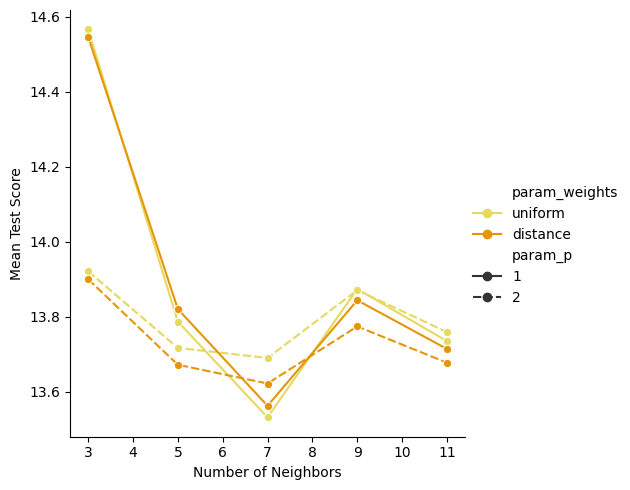

Train RMSE -> 17.323642889807775
Test RMSE -> 19.782994662291586


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error as MSE
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for KNeighborsRegressor
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # p=1 for Manhattan distance, p=2 for Euclidean distance
}

knn = KNeighborsRegressor()

knn_gs = GridSearchCV(
    knn, param_grid,
    cv=4, n_jobs=-1, verbose=1, scoring="neg_mean_absolute_error"
)

# Assuming X_train_scaled and y_train are predefined
knn_gs.fit(X_train_scaled, y_train)

print(f"Best Parameters -> {knn_gs.best_params_ }")
print(f"Best Score -> {-round(knn_gs.best_score_, 2)}")

knn_df = pd.DataFrame(knn_gs.cv_results_)
knn_df["mean_test_score"] = -knn_df["mean_test_score"]

# Visualization of the parameter search results
params_palette = sns.color_palette("CMRmap_r", n_colors=len(param_grid['n_neighbors']))

g = sns.relplot(data=knn_df, x="param_n_neighbors", y="mean_test_score", hue="param_weights",
                style="param_p", kind="line", marker="o", palette=params_palette)

g.set(xlabel="Number of Neighbors", ylabel="Mean Test Score")
g.set_titles(col_template="k-NN: {col_name}", size="x-large")

plt.show()

# Best estimator fitting and evaluation
best_knn_est = knn_gs.best_estimator_

best_knn_est.fit(X_train_scaled, y_train)

y_pred_train = best_knn_est.predict(X_train_scaled)
y_pred_test = best_knn_est.predict(X_test_scaled)

print(f"Train RMSE -> {MSE(y_train, y_pred_train)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test)**0.5}")



In [ ]:
from sklearn.metrics import r2_score

# Prédictions sur les ensembles d'entraînement et de test
y_pred_train = best_svr_est.predict(X_train_scaled)
y_pred_test = best_svr_est.predict(X_test_scaled)

# Calcul de R^2 pour l'ensemble d'entraînement
r2_train = r2_score(y_train, y_pred_train)

# Calcul de R^2 pour l'ensemble de test
r2_test = r2_score(y_test, y_pred_test)

print(f"Train R^2 -> {r2_train}")
print(f"Test R^2 -> {r2_test}")

Train R^2 -> 0.378250577379006
Test R^2 -> 0.28080882698883824


In [ ]:
y_pred_continuous = knn_gs.best_estimator_.predict(X_test)

In [ ]:

# Définir un seuil pour convertir les prédictions continues en classes discrètes
threshold = np.median(y_train)  # Exemple de seuil basé sur la médiane de y_train
y_pred_classes = (y_pred_continuous >= threshold).astype(int)
y_test_classes = (y_test >= threshold).astype(int)

# Calcul des métriques de classification
accuracy = accuracy_score(y_test_classes, y_pred_classes)
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.5454545454545454
Precision: 0.4878048780487805
Recall: 0.6896551724137931
F1-score: 0.5714285714285714
Confusion Matrix:
[[16 21]
 [ 9 20]]


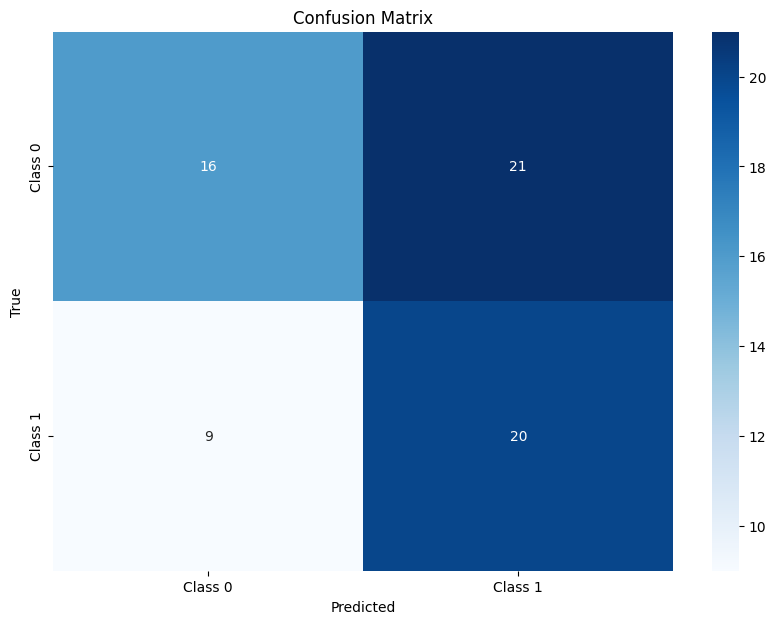

<ipython-input-56-5cf1357c1cf9>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')


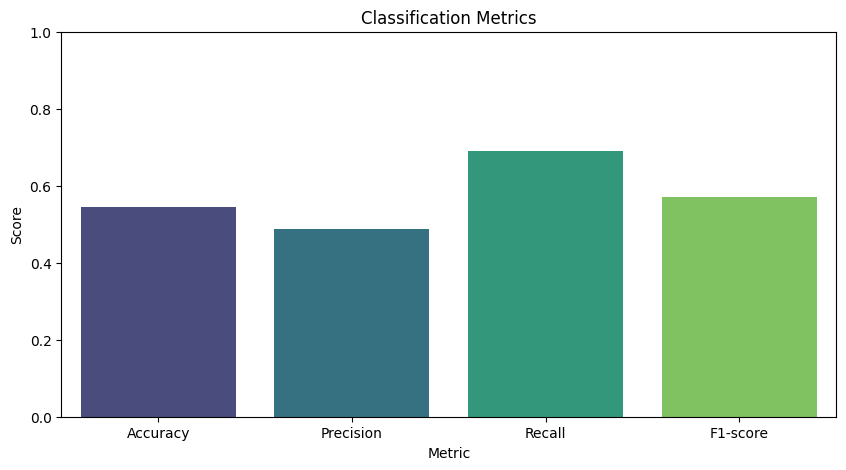

In [ ]:
# Fonction pour afficher la matrice de confusion
def plot_confusion_matrix(conf_matrix, labels, title='Confusion Matrix'):
    plt.figure(figsize=(10, 7))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(title)
    plt.show()

# Affichage de la matrice de confusion
labels = ['Class 0', 'Class 1']  # Remplacez par les noms réels des classes si disponible
plot_confusion_matrix(conf_matrix, labels)

# Visualisation des métriques
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
           'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics)

plt.figure(figsize=(10, 5))
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis')
plt.ylim(0, 1)
plt.title('Classification Metrics')
plt.show()

Classification Metrics:
      Metric     Score
0   Accuracy  0.545455
1  Precision  0.487805
2     Recall  0.689655
3   F1-score  0.571429

Confusion Matrix:
          Predicted 0  Predicted 1
Actual 0           16           21
Actual 1            9           20


<ipython-input-57-012e05985efa>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', ax=axes[1])


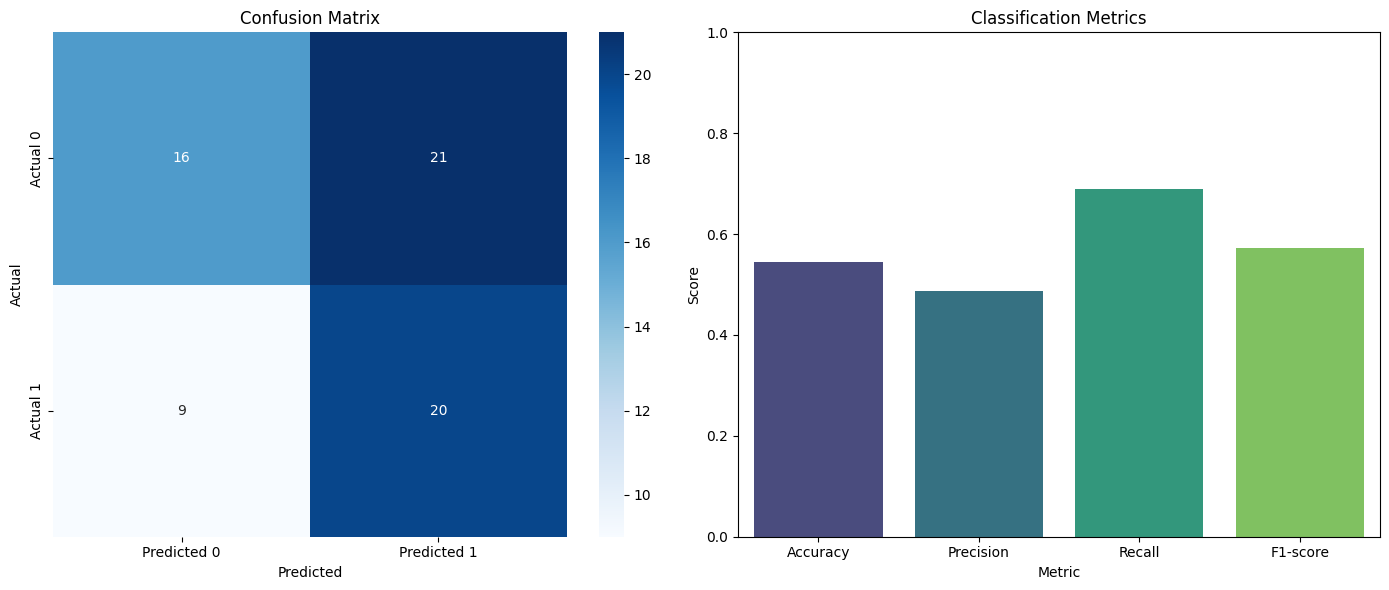

In [ ]:
# Créer un DataFrame pour les métriques
metrics = {'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-score'],
           'Score': [accuracy, precision, recall, f1]}
metrics_df = pd.DataFrame(metrics)

# Affichage des métriques
print("Classification Metrics:")
print(metrics_df)

# Affichage de la matrice de confusion
conf_matrix_df = pd.DataFrame(conf_matrix, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

print("\nConfusion Matrix:")
print(conf_matrix_df)

# Visualisation des métriques et de la matrice de confusion
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Visualisation de la matrice de confusion
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[0], xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
axes[0].set_title('Confusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Visualisation des métriques
sns.barplot(x='Metric', y='Score', data=metrics_df, palette='viridis', ax=axes[1])
axes[1].set_ylim(0, 1)
axes[1].set_title('Classification Metrics')

plt.tight_layout()
plt.show()

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best Parameters -> {'metric': 'manhattan', 'n_neighbors': 7, 'weights': 'uniform'}
Best Score -> 13.53


<ipython-input-58-8c546d4abca2>:28: UserWarning: The palette list has more values (4) than needed (2), which may not be intended.
  g = sns.relplot(data=knn_df, x="param_n_neighbors", y="mean_test_score", hue="param_weights", col="param_metric",


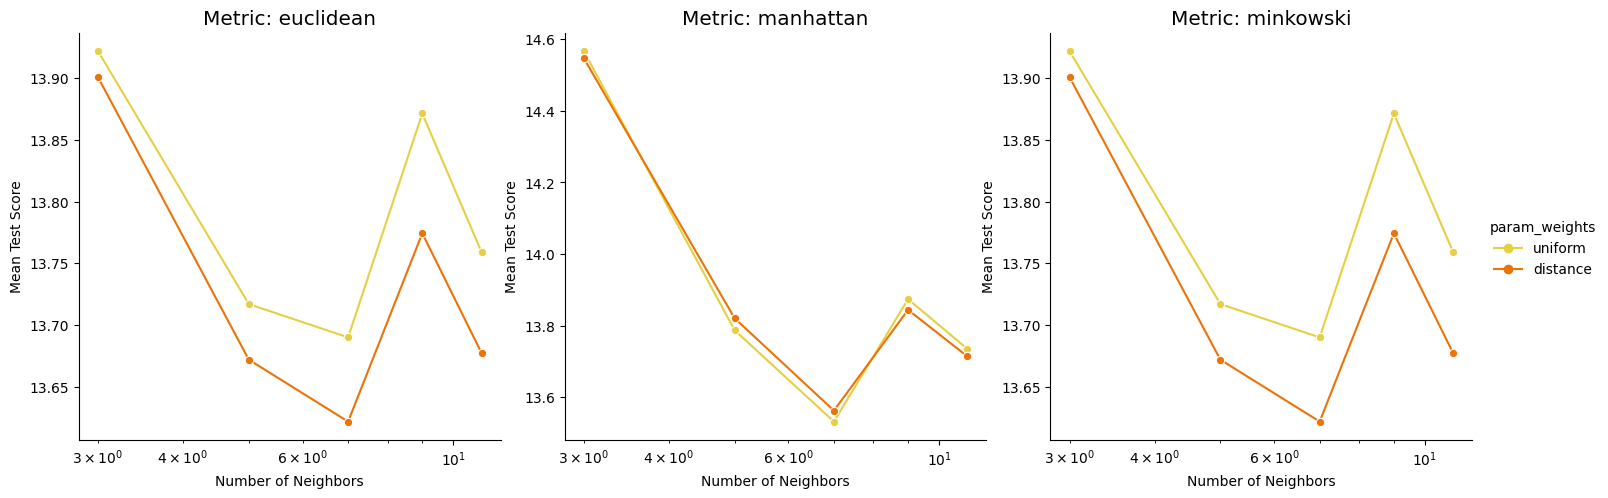

Train RMSE -> 17.323642889807775
Test RMSE -> 19.782994662291586
Train R^2 -> 0.33093811347322744
Test R^2 -> 0.01466880701583917


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV

param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

knn = KNeighborsRegressor()

knn_gs = GridSearchCV(
    knn, param_grid_knn,
    cv=4, n_jobs=-1, verbose=1, scoring="neg_mean_absolute_error"
)

knn_gs.fit(X_train_scaled, y_train)

print(f"Best Parameters -> {knn_gs.best_params_}")

print(f"Best Score -> {-round(knn_gs.best_score_, 2)}")

knn_df = pd.DataFrame(knn_gs.cv_results_)
knn_df["mean_test_score"] = -knn_df["mean_test_score"]

params_palette = sns.color_palette("CMRmap_r", n_colors=4)

g = sns.relplot(data=knn_df, x="param_n_neighbors", y="mean_test_score", hue="param_weights", col="param_metric",
                kind="line", facet_kws={"sharey":False},
                palette=params_palette, marker="o")

g.set(xscale="log", xlabel="Number of Neighbors", ylabel="Mean Test Score")
g.set_titles(col_template="Metric: {col_name}", size="x-large")

plt.show()

best_knn_est = knn_gs.best_estimator_

best_knn_est.fit(X_train_scaled, y_train)

y_pred_train_knn = best_knn_est.predict(X_train_scaled)
y_pred_test_knn = best_knn_est.predict(X_test_scaled)

print(f"Train RMSE -> {MSE(y_train, y_pred_train_knn)**0.5}")
print(f"Test RMSE -> {MSE(y_test, y_pred_test_knn)**0.5}")

# Calcul de R^2 pour KNN
r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

print(f"Train R^2 -> {r2_train_knn}")
print(f"Test R^2 -> {r2_test_knn}")


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate MSE and R2
mse = mean_squared_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

print(f"Test MSE: {mse}")
print(f"Test R2: {r2}")

Test MSE: 285.6578640083317
Test R2: 0.28080882698883824
